In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
SEED = 2
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)

In [3]:
df = pd.read_csv("Chennai houseing sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

| Column Name | Description |
| ----------- | ----------- |
| PRT_ID | ID of House |
| AREA           | In which area house is located in Chennai |
| INT_SQFT       | Area in sqft |
| DATE_SALE      | When house was sold |
| DIST_MAINROAD  | Distance of house from main road |
| N_BEDROOM      | Number of Bedrooms |
| N_BATHROOM     | Number of Bathrooms |
| N_ROOM         | Number of Rooms |
| SALE_COND      | Sale condition |
| PARK_FACIL     | Is parking available or not |
| DATE_BUILD     | Date house was built |
| BUILDTYPE      | Purpose of house |
| UTILITY_AVAIL  | Facilities available there |
| STREET         | How is street outside that house |
| MZZONE         | Which zone it is in |
| QS_ROOMS       | It is masked data |
| QS_BATHROOM    | It is masked data |
| QS_BEDROOM     | It is masked data |
| QS_OVERALL     | It is masked data |
| REG_FEE        | Registration fee after sales |
| COMMIS         | Commission fee after sales |
| SALES_PRICE    | Sale price of house |

In [5]:
#from pandas_profiling import profile_report
#profile_report.ProfileReport(df, title='Pandas Profiling Report for Chennai Housing Price Dataset', explorative=True, vars={"num": {"low_categorical_threshold": 0}}).to_file("CHN_House_Price_Analysis.html")

In [6]:
data = df.drop(['PRT_ID', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'], axis = 1)

In [7]:
data.isnull().sum()/len(df)*100

AREA             0.000000
INT_SQFT         0.000000
DATE_SALE        0.000000
DIST_MAINROAD    0.000000
N_BEDROOM        0.014067
N_BATHROOM       0.070333
N_ROOM           0.000000
SALE_COND        0.000000
PARK_FACIL       0.000000
DATE_BUILD       0.000000
BUILDTYPE        0.000000
UTILITY_AVAIL    0.000000
STREET           0.000000
MZZONE           0.000000
REG_FEE          0.000000
COMMIS           0.000000
SALES_PRICE      0.000000
dtype: float64

In [8]:
data['N_BEDROOM'].dtype

dtype('float64')

In [9]:
data['N_BATHROOM'].dtype

dtype('float64')

In [10]:
data['N_BEDROOM'] = data['N_BEDROOM'].fillna(round(data['N_BEDROOM'].mean()))
data['N_BATHROOM'] = data['N_BATHROOM'].fillna(round(data['N_BATHROOM'].mean()))

In [11]:
data['N_BEDROOM'].unique()

array([1., 2., 3., 4.])

In [12]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,237000,74063,7406250


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  REG_FEE        7109 non-null   int64  
 15  COMMIS         7109 non-null   int64  
 16  SALES_PRICE    7109 non-null   int64  
dtypes: float64(2), int64(6), object(9)
memory usage: 944

In [14]:
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'], format="%d-%m-%Y")

In [15]:
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'], format="%d-%m-%Y")

In [16]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,2011-05-04,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,380000,144400,7600000
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,Adyar,909,2012-02-04,70,1.0,1.0,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,356321,77042,9630290
4,Karapakkam,1226,2009-10-05,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,237000,74063,7406250


In [17]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [18]:
cat_cols = ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
            'UTILITY_AVAIL', 'STREET', 'MZZONE']
for i in cat_cols:
    print("Unique values in ", i, ":", data[i].unique(),"\n")

Unique values in  AREA : ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar'] 

Unique values in  SALE_COND : ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl'] 

Unique values in  PARK_FACIL : ['Yes' 'No' 'Noo'] 

Unique values in  BUILDTYPE : ['Commercial' 'Others' 'Other' 'House' 'Comercial'] 

Unique values in  UTILITY_AVAIL : ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub'] 

Unique values in  STREET : ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess'] 

Unique values in  MZZONE : ['A' 'RH' 'RL' 'I' 'C' 'RM'] 



In [19]:
data['AREA'] = data['AREA'].replace({'Karapakam':'Karapakkam',
                                     'TNagar':'T Nagar', 
                                     'Chrompt':'Chrompet', 
                                     'Chrmpet':'Chrompet', 
                                     'Chormpet':'Chrompet', 
                                     'Adyr':'Adyar', 
                                     'Velchery':'Velachery', 
                                     'Ann Nagar':'Anna Nagar', 
                                     'KKNagar':'KK Nagar', 
                                     'Ana Nagar':'Anna Nagar'})

In [20]:
data['SALE_COND'] = data['SALE_COND'].replace({'AbNormal':'Abnormal', 
                                           'Ab Normal':'Abnormal',
                                           'Partiall':'Partial',
                                           'AdjLand':'Adj Land',
                                           'PartiaLl':'Partial'})

In [21]:
data['PARK_FACIL'] = data['PARK_FACIL'].replace({'Noo':'No'})

In [22]:
data['BUILDTYPE'] = data['BUILDTYPE'].replace({'Comercial':'Commercial',
                                           'Other':'Others'})

In [23]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].replace({'AllPub':'All Pub'})

In [24]:
data['STREET'] = data['STREET'].replace({'Pavd':'Paved', 
                                     'NoAccess':'No Access'})

In [25]:
for i in cat_cols:
    print("Unique values in ", i, ":", data[i].unique(),"\n")

Unique values in  AREA : ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar'] 

Unique values in  SALE_COND : ['Abnormal' 'Family' 'Partial' 'Adj Land' 'Normal Sale'] 

Unique values in  PARK_FACIL : ['Yes' 'No'] 

Unique values in  BUILDTYPE : ['Commercial' 'Others' 'House'] 

Unique values in  UTILITY_AVAIL : ['All Pub' 'ELO' 'NoSewr ' 'NoSeWa'] 

Unique values in  STREET : ['Paved' 'Gravel' 'No Access'] 

Unique values in  MZZONE : ['A' 'RH' 'RL' 'I' 'C' 'RM'] 



In [26]:
#import sweetviz 
#my_report = sweetviz.analyze(data,target_feat='SALES_PRICE')
#my_report.show_html('EDA_Report.html')

In [27]:
data['DATE_SALE_DAY'] = data['DATE_SALE'].dt.day
data['DATE_SALE_MONTH'] = data['DATE_SALE'].dt.month
data['DATE_SALE_YEAR'] = data['DATE_SALE'].dt.year

In [28]:
data['DATE_BUILD_DAY'] = data['DATE_BUILD'].dt.day
data['DATE_BUILD_MONTH'] = data['DATE_BUILD'].dt.month
data['DATE_BUILD_YEAR'] = data['DATE_BUILD'].dt.year

In [29]:
data = data.drop(['DATE_SALE', 'DATE_BUILD'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AREA              7109 non-null   object 
 1   INT_SQFT          7109 non-null   int64  
 2   DIST_MAINROAD     7109 non-null   int64  
 3   N_BEDROOM         7109 non-null   float64
 4   N_BATHROOM        7109 non-null   float64
 5   N_ROOM            7109 non-null   int64  
 6   SALE_COND         7109 non-null   object 
 7   PARK_FACIL        7109 non-null   object 
 8   BUILDTYPE         7109 non-null   object 
 9   UTILITY_AVAIL     7109 non-null   object 
 10  STREET            7109 non-null   object 
 11  MZZONE            7109 non-null   object 
 12  REG_FEE           7109 non-null   int64  
 13  COMMIS            7109 non-null   int64  
 14  SALES_PRICE       7109 non-null   int64  
 15  DATE_SALE_DAY     7109 non-null   int64  
 16  DATE_SALE_MONTH   7109 non-null   int64  


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
    data[i] = le.fit_transform(data[i])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AREA              7109 non-null   int32  
 1   INT_SQFT          7109 non-null   int64  
 2   DIST_MAINROAD     7109 non-null   int64  
 3   N_BEDROOM         7109 non-null   float64
 4   N_BATHROOM        7109 non-null   float64
 5   N_ROOM            7109 non-null   int64  
 6   SALE_COND         7109 non-null   int32  
 7   PARK_FACIL        7109 non-null   int32  
 8   BUILDTYPE         7109 non-null   int32  
 9   UTILITY_AVAIL     7109 non-null   int32  
 10  STREET            7109 non-null   int32  
 11  MZZONE            7109 non-null   int32  
 12  REG_FEE           7109 non-null   int64  
 13  COMMIS            7109 non-null   int64  
 14  SALES_PRICE       7109 non-null   int64  
 15  DATE_SALE_DAY     7109 non-null   int64  
 16  DATE_SALE_MONTH   7109 non-null   int64  


<AxesSubplot:>

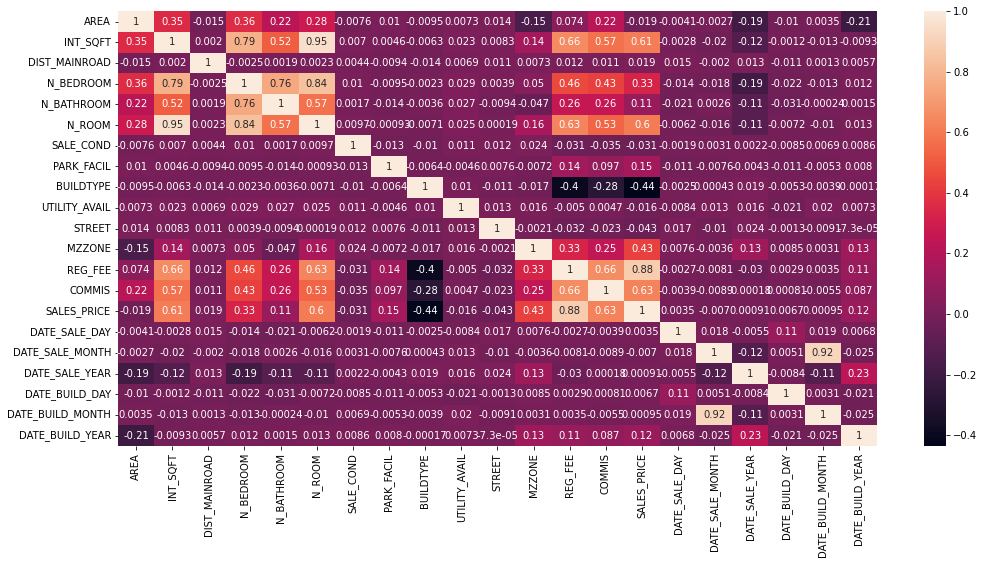

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 8))
sns.heatmap(data.corr(), annot=True)

In [33]:
final_data = data.drop(['N_ROOM', 'DATE_BUILD_MONTH'], axis = 1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AREA             7109 non-null   int32  
 1   INT_SQFT         7109 non-null   int64  
 2   DIST_MAINROAD    7109 non-null   int64  
 3   N_BEDROOM        7109 non-null   float64
 4   N_BATHROOM       7109 non-null   float64
 5   SALE_COND        7109 non-null   int32  
 6   PARK_FACIL       7109 non-null   int32  
 7   BUILDTYPE        7109 non-null   int32  
 8   UTILITY_AVAIL    7109 non-null   int32  
 9   STREET           7109 non-null   int32  
 10  MZZONE           7109 non-null   int32  
 11  REG_FEE          7109 non-null   int64  
 12  COMMIS           7109 non-null   int64  
 13  SALES_PRICE      7109 non-null   int64  
 14  DATE_SALE_DAY    7109 non-null   int64  
 15  DATE_SALE_MONTH  7109 non-null   int64  
 16  DATE_SALE_YEAR   7109 non-null   int64  
 17  DATE_BUILD_DAY

In [34]:
X = final_data.drop(['SALES_PRICE'], axis = 1)
y = final_data['SALES_PRICE']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [36]:
X_train.shape

(5331, 18)

In [37]:
X_test.shape

(1778, 18)

In [38]:
y_train.shape

(5331,)

In [39]:
y_test.shape

(1778,)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# n = no of observations
# k = no of independent variables
def acc_metrics(y_test,y_pred,n,k):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    rmsle = np.log(rmse)
    r2 = r2_score(y_test,y_pred)
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    return(mae, mse, rmse, rmsle, r2, adj_r2_score)

In [42]:
def loss_plot(model):
    # Model accuracy
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
regr_1 = keras.Sequential()
regr_1.add(layers.Dense(18, input_shape=(18,), activation='relu'))
regr_1.add(layers.Dense(36, activation='relu'))
regr_1.add(layers.Dense(36, activation='relu'))
regr_1.add(layers.Dense(1))
regr_1.compile(loss='mean_squared_error', optimizer='adam')
regr_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 18)                342       
                                                                 
 dense_7 (Dense)             (None, 36)                684       
                                                                 
 dense_8 (Dense)             (None, 36)                1332      
                                                                 
 dense_9 (Dense)             (None, 1)                 37        
                                                                 
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_1=regr_1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100, batch_size=32)

Epoch 1/100
167/167 [==============================] - 1s 3ms/step - loss: 133671696728064.0000 - val_loss: 130567559446528.0000
Epoch 2/100
167/167 [==============================] - 0s 2ms/step - loss: 133600745881600.0000 - val_loss: 130382582251520.0000
Epoch 3/100
167/167 [==============================] - 0s 2ms/step - loss: 133104417112064.0000 - val_loss: 129488104980480.0000
Epoch 4/100
167/167 [==============================] - 0s 2ms/step - loss: 131450854703104.0000 - val_loss: 127054829846528.0000
Epoch 5/100
167/167 [==============================] - 0s 2ms/step - loss: 127696306700288.0000 - val_loss: 122130716950528.0000
Epoch 6/100
167/167 [==============================] - 0s 2ms/step - loss: 120972652838912.0000 - val_loss: 114017850884096.0000
Epoch 7/100
167/167 [==============================] - 0s 2ms/step - loss: 110779848196096.0000 - val_loss: 102511834824704.0000
Epoch 8/100
167/167 [==============================] - 0s 2ms/step - loss: 97266849284096.0000 - 

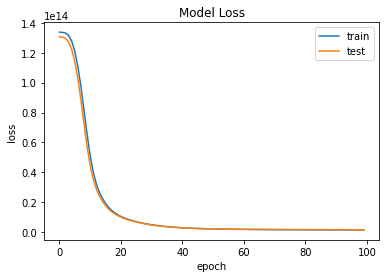

In [54]:
loss_plot(model_1)

In [55]:
metrics_1 = acc_metrics(y_test, regr_1.predict(X_test),X_test.shape[0],X_test.shape[1])
print("MAE: ",metrics_1[0])
print("MSE: ",metrics_1[1])
print("RMSE: ",metrics_1[2])
print("RMSLE: ",metrics_1[3])
print("R-Squared: ",metrics_1[4])
print("Adjusted R-Squared: ",metrics_1[5])

MAE:  988926.3397075365
MSE:  1601683212642.626
RMSE:  1265576.2373885764
RMSLE:  14.0510381000517
R-Squared:  0.8846068058568921
Adjusted R-Squared:  0.8834259772641826


In [56]:
regr_2 = keras.Sequential()
regr_2.add(layers.Dense(18, input_shape=(18,), activation='relu'))
regr_2.add(layers.Dense(9, activation='relu'))
regr_2.add(layers.Dense(9, activation='relu'))
regr_2.add(layers.Dense(1))
regr_2.compile(loss='mean_squared_error', optimizer='adam')
regr_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 18)                342       
                                                                 
 dense_11 (Dense)            (None, 9)                 171       
                                                                 
 dense_12 (Dense)            (None, 9)                 90        
                                                                 
 dense_13 (Dense)            (None, 1)                 10        
                                                                 
Total params: 613
Trainable params: 613
Non-trainable params: 0
_________________________________________________________________


In [57]:
model_2=regr_2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100, batch_size=32)

Epoch 1/100
167/167 [==============================] - 1s 3ms/step - loss: 133673525444608.0000 - val_loss: 130576560422912.0000
Epoch 2/100
167/167 [==============================] - 0s 2ms/step - loss: 133668869767168.0000 - val_loss: 130565613289472.0000
Epoch 3/100
167/167 [==============================] - 0s 2ms/step - loss: 133641246081024.0000 - val_loss: 130516690927616.0000
Epoch 4/100
167/167 [==============================] - 0s 2ms/step - loss: 133550951104512.0000 - val_loss: 130380896141312.0000
Epoch 5/100
167/167 [==============================] - 0s 2ms/step - loss: 133339801452544.0000 - val_loss: 130098938249216.0000
Epoch 6/100
167/167 [==============================] - 0s 2ms/step - loss: 132940428214272.0000 - val_loss: 129604530470912.0000
Epoch 7/100
167/167 [==============================] - 0s 2ms/step - loss: 132289119911936.0000 - val_loss: 128833088913408.0000
Epoch 8/100
167/167 [==============================] - 0s 2ms/step - loss: 131312182624256.0000 -

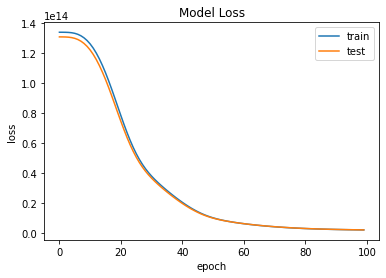

In [58]:
loss_plot(model_2)

In [59]:
metrics_2 = acc_metrics(y_test, regr_2.predict(X_test),X_test.shape[0],X_test.shape[1])
print("MAE: ",metrics_2[0])
print("MSE: ",metrics_2[1])
print("RMSE: ",metrics_2[2])
print("RMSLE: ",metrics_2[3])
print("R-Squared: ",metrics_2[4])
print("Adjusted R-Squared: ",metrics_2[5])

MAE:  1145001.946006749
MSE:  2191851471414.1577
RMSE:  1480490.2807563979
RMSLE:  14.207883861663598
R-Squared:  0.8420881605193022
Adjusted R-Squared:  0.8404722349305287


In [62]:
regr_3 = keras.Sequential()
regr_3.add(layers.Dense(18, input_shape=(18,), activation='relu'))
regr_3.add(layers.Dense(54, activation='relu'))
regr_3.add(layers.Dense(54, activation='relu'))
regr_3.add(layers.Dense(1))
regr_3.compile(loss='mean_squared_error', optimizer='adam')
regr_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 18)                342       
                                                                 
 dense_19 (Dense)            (None, 54)                1026      
                                                                 
 dense_20 (Dense)            (None, 54)                2970      
                                                                 
 dense_21 (Dense)            (None, 1)                 55        
                                                                 
Total params: 4,393
Trainable params: 4,393
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_3=regr_3.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100, batch_size=32)

Epoch 1/100
167/167 [==============================] - 1s 3ms/step - loss: 133669901565952.0000 - val_loss: 130556587147264.0000
Epoch 2/100
167/167 [==============================] - 0s 2ms/step - loss: 133501793861632.0000 - val_loss: 130112049643520.0000
Epoch 3/100
167/167 [==============================] - 0s 2ms/step - loss: 132301895761920.0000 - val_loss: 127949441335296.0000
Epoch 4/100
167/167 [==============================] - 0s 2ms/step - loss: 128352639778816.0000 - val_loss: 122148735680512.0000
Epoch 5/100
167/167 [==============================] - 0s 2ms/step - loss: 119717515755520.0000 - val_loss: 111091115884544.0000
Epoch 6/100
167/167 [==============================] - 0s 2ms/step - loss: 105371855224832.0000 - val_loss: 94796563611648.0000
Epoch 7/100
167/167 [==============================] - 0s 2ms/step - loss: 86504533655552.0000 - val_loss: 75503461466112.0000
Epoch 8/100
167/167 [==============================] - 0s 2ms/step - loss: 67114765385728.0000 - val

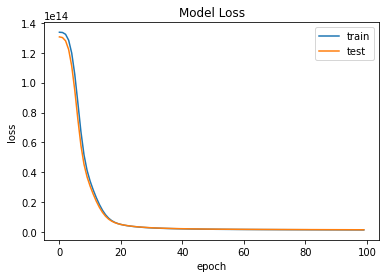

In [64]:
loss_plot(model_3)

In [65]:
metrics_3 = acc_metrics(y_test, regr_3.predict(X_test),X_test.shape[0],X_test.shape[1])
print("MAE: ",metrics_3[0])
print("MSE: ",metrics_3[1])
print("RMSE: ",metrics_3[2])
print("RMSLE: ",metrics_3[3])
print("R-Squared: ",metrics_3[4])
print("Adjusted R-Squared: ",metrics_3[5])

MAE:  1007623.9693475815
MSE:  1626445714618.4814
RMSE:  1275321.8082580103
RMSLE:  14.05870910336122
R-Squared:  0.8828227925292788
Adjusted R-Squared:  0.8816237079730121


In [71]:
regr_4 = keras.Sequential()
regr_4.add(layers.Dense(18, input_shape=(18,), activation='relu'))
regr_4.add(layers.Dense(36, activation='relu'))
regr_4.add(layers.Dense(36, activation='relu'))
regr_4.add(layers.Dense(1))
regr_4.compile(loss='mean_squared_error', optimizer='RMSprop')
regr_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 18)                342       
                                                                 
 dense_31 (Dense)            (None, 36)                684       
                                                                 
 dense_32 (Dense)            (None, 36)                1332      
                                                                 
 dense_33 (Dense)            (None, 1)                 37        
                                                                 
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_4=regr_4.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100, batch_size=32)

Epoch 1/100
167/167 [==============================] - 1s 4ms/step - loss: 133672837578752.0000 - val_loss: 130574027063296.0000
Epoch 2/100
167/167 [==============================] - 0s 3ms/step - loss: 133660271443968.0000 - val_loss: 130548534083584.0000
Epoch 3/100
167/167 [==============================] - 0s 3ms/step - loss: 133608706670592.0000 - val_loss: 130466426388480.0000
Epoch 4/100
167/167 [==============================] - 0s 3ms/step - loss: 133473155153920.0000 - val_loss: 130279192657920.0000
Epoch 5/100
167/167 [==============================] - 0s 3ms/step - loss: 133199317434368.0000 - val_loss: 129925830934528.0000
Epoch 6/100
167/167 [==============================] - 0s 3ms/step - loss: 132712107081728.0000 - val_loss: 129323109449728.0000
Epoch 7/100
167/167 [==============================] - 0s 3ms/step - loss: 131923863142400.0000 - val_loss: 128388828233728.0000
Epoch 8/100
167/167 [==============================] - 0s 3ms/step - loss: 130740347994112.0000 -

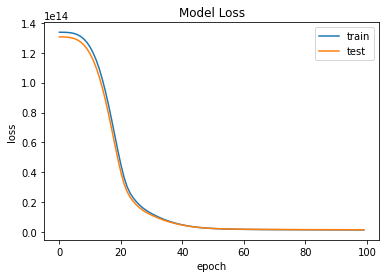

In [73]:
loss_plot(model_4)

In [74]:
metrics_4 = acc_metrics(y_test, regr_4.predict(X_test),X_test.shape[0],X_test.shape[1])
print("MAE: ",metrics_4[0])
print("MSE: ",metrics_4[1])
print("RMSE: ",metrics_4[2])
print("RMSLE: ",metrics_4[3])
print("R-Squared: ",metrics_4[4])
print("Adjusted R-Squared: ",metrics_4[5])

MAE:  988758.1413104612
MSE:  1593082586622.6628
RMSE:  1262173.754529329
RMSLE:  14.048345994483455
R-Squared:  0.8852264375669832
Adjusted R-Squared:  0.8840519497194594
